In [2]:
import numpy as np
np.set_printoptions(linewidth=100)

import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
# Apply the default theme
plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
mpl.rcParams['font.family'] = ['serif']

In [5]:
corr_H_Bond_C_H_F=np.genfromtxt('./il2/h_bond_correlation/h_bond_C_H_F.csv', delimiter=' ')
print(corr_H_Bond_C_H_F.shape)
print(corr_H_Bond_C_H_F.dtype)
corr_H_Bond_C_H_O_anion=np.genfromtxt('./il2/h_bond_correlation/h_bond_C_H_O_anion.csv', delimiter=' ')
print(corr_H_Bond_C_H_O_anion.shape)
print(corr_H_Bond_C_H_O_anion.dtype)
corr_H_Bond_C_H_O_cation=np.genfromtxt('./il2/h_bond_correlation/h_bond_C_H_O_cation.csv', delimiter=' ')
print(corr_H_Bond_C_H_O_cation.shape)
print(corr_H_Bond_C_H_O_cation.dtype)

corr_H_Bond_O_H_F=np.genfromtxt('./il2/h_bond_correlation/h_bond_O_H_F.csv', delimiter=' ')
print(corr_H_Bond_O_H_F.shape)
print(corr_H_Bond_O_H_F.dtype)

corr_H_Bond_O_H_O_anion=np.genfromtxt('./il2/h_bond_correlation/h_bond_O_H_O_anion.csv', delimiter=' ')
print(corr_H_Bond_O_H_O_anion.shape)
print(corr_H_Bond_O_H_O_anion.dtype)

corr_H_Bond_O_H_O_cation=np.genfromtxt('./il2/h_bond_correlation/h_bond_O_H_O_cation.csv', delimiter=' ')
print(corr_H_Bond_O_H_O_cation.shape)
print(corr_H_Bond_O_H_O_cation.dtype)

(2, 151)
float64
(2, 251)
float64
(2, 501)
float64
(2, 2001)
float64
(2, 501)
float64
(2, 1101)
float64


/tmp/ipykernel_6060/1139189390.py:16: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 1000)


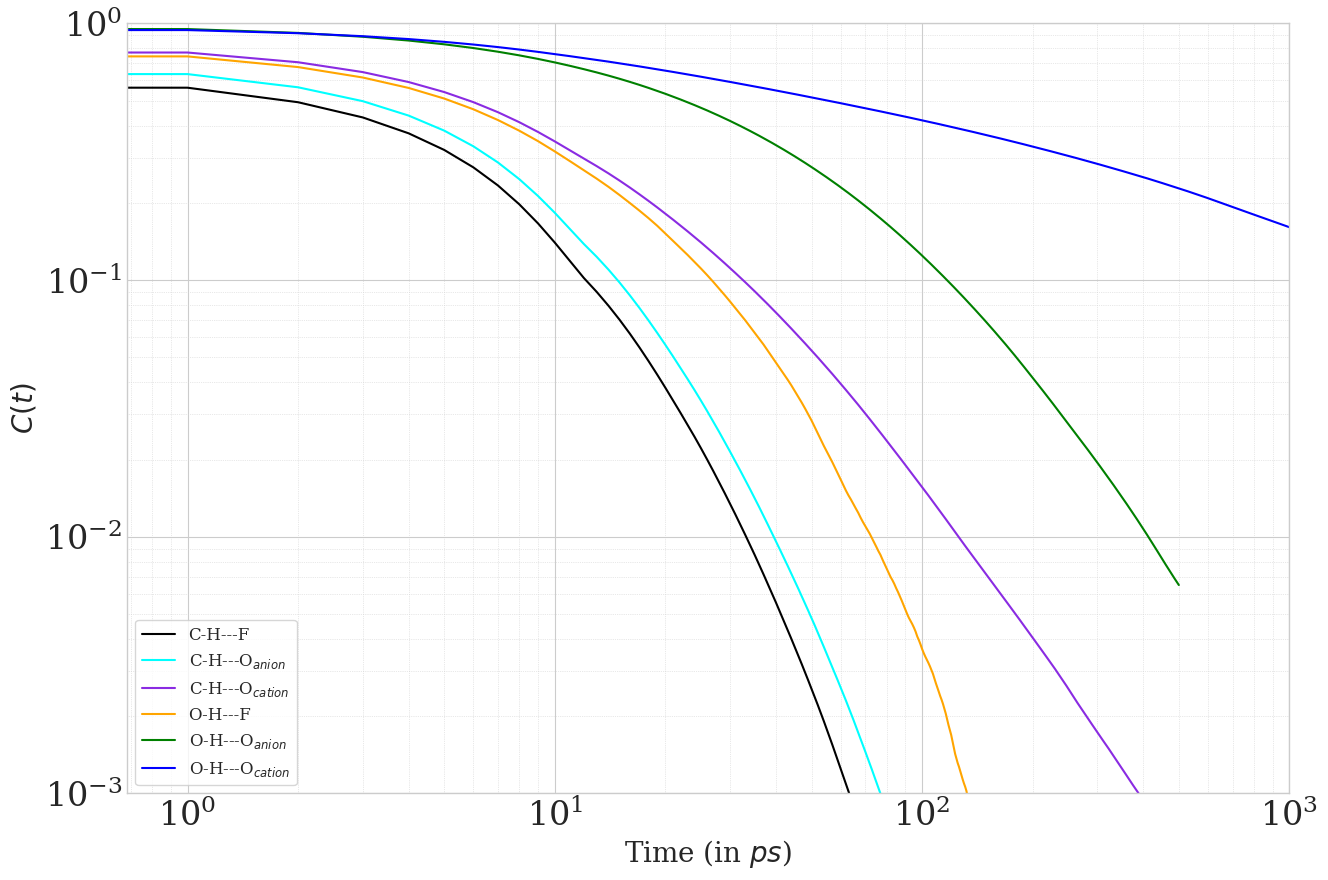

In [18]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(111)
ax.loglog(corr_H_Bond_C_H_F[0, :], corr_H_Bond_C_H_F[1, :], linestyle='solid', color='black', label=r'C-H---F')
ax.loglog(corr_H_Bond_C_H_O_anion[0, :], corr_H_Bond_C_H_O_anion[1, :], linestyle='solid', color='cyan', label=r'C-H---O$_{anion}$')
ax.loglog(corr_H_Bond_C_H_O_cation[0, :], corr_H_Bond_C_H_O_cation[1, :], linestyle='solid', color='blueviolet', label=r'C-H---O$_{cation}$')
ax.loglog(corr_H_Bond_O_H_F[0, :], corr_H_Bond_O_H_F[1, :], linestyle='solid', color='orange', label=r'O-H---F')
ax.loglog(corr_H_Bond_O_H_O_anion[0, :], corr_H_Bond_O_H_O_anion[1, :], linestyle='solid', color='green', label=r'O-H---O$_{anion}$')
ax.loglog(corr_H_Bond_O_H_O_cation[0, :], corr_H_Bond_O_H_O_cation[1, :], linestyle='solid', color='blue', label=r'O-H---O$_{cation}$')

plt.xlabel(r"Time (in $ps$)", fontsize=20)
plt.ylabel(r"$C(t)$", fontsize=20)
plt.grid(visible=True, axis='both')
plt.grid(visible=True, which = 'minor', axis='both', color='lightgray', linestyle=':', linewidth=0.5)
plt.minorticks_on()
plt.legend(fontsize=12, frameon = True, loc = 'lower left')
ax.set_xlim(0, 1000)
ax.set_ylim(10e-4, 1)
plt.show()

/tmp/ipykernel_6060/328532869.py:16: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 1100)


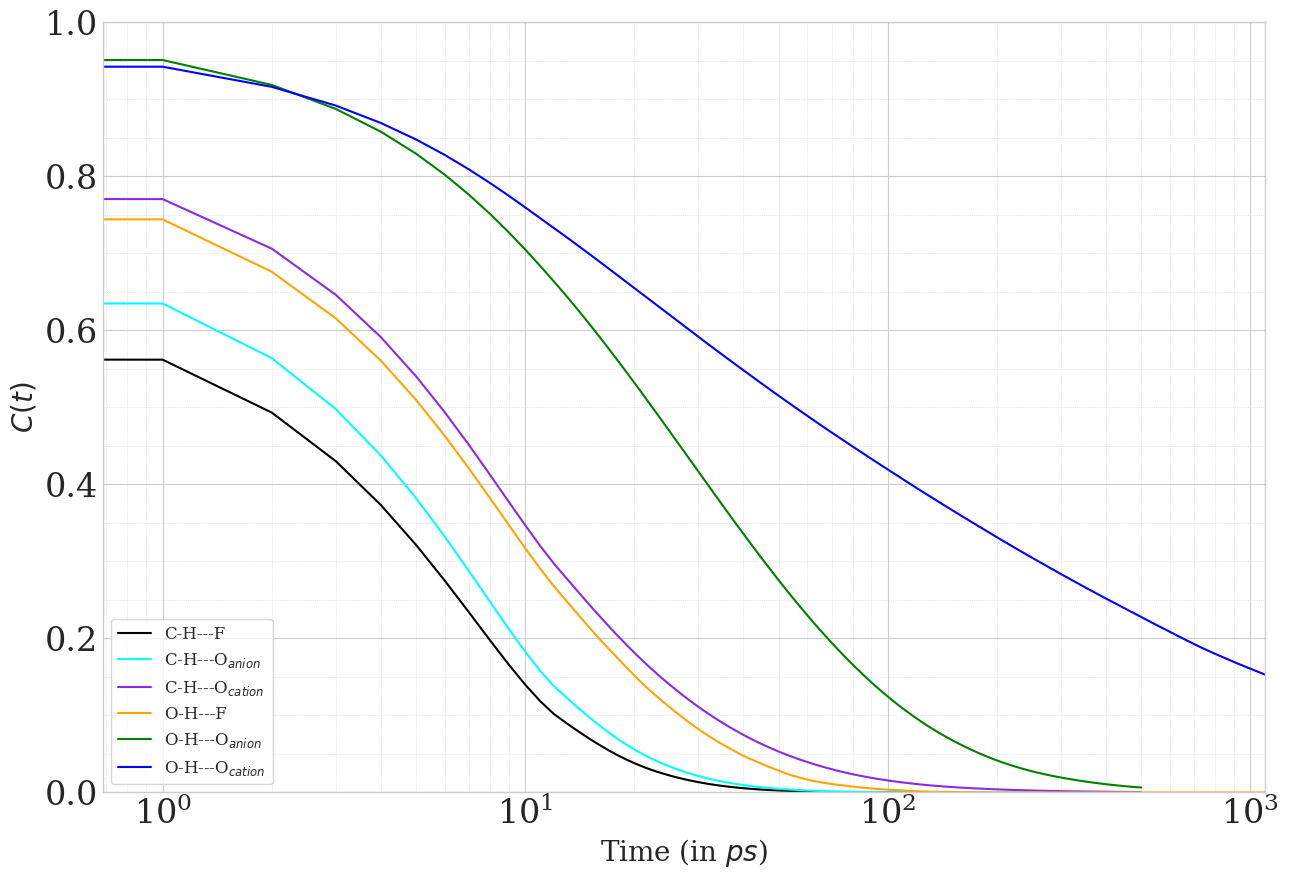

In [19]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(111)
ax.semilogx(corr_H_Bond_C_H_F[0, :], corr_H_Bond_C_H_F[1, :], linestyle='solid', color='black', label=r'C-H---F')
ax.semilogx(corr_H_Bond_C_H_O_anion[0, :], corr_H_Bond_C_H_O_anion[1, :], linestyle='solid', color='cyan', label=r'C-H---O$_{anion}$')
ax.semilogx(corr_H_Bond_C_H_O_cation[0, :], corr_H_Bond_C_H_O_cation[1, :], linestyle='solid', color='blueviolet', label=r'C-H---O$_{cation}$')
ax.semilogx(corr_H_Bond_O_H_F[0, :], corr_H_Bond_O_H_F[1, :], linestyle='solid', color='orange', label=r'O-H---F')
ax.semilogx(corr_H_Bond_O_H_O_anion[0, :], corr_H_Bond_O_H_O_anion[1, :], linestyle='solid', color='green', label=r'O-H---O$_{anion}$')
ax.semilogx(corr_H_Bond_O_H_O_cation[0, :], corr_H_Bond_O_H_O_cation[1, :], linestyle='solid', color='blue', label=r'O-H---O$_{cation}$')

plt.xlabel(r"Time (in $ps$)", fontsize=20)
plt.ylabel(r"$C(t)$", fontsize=20)
plt.grid(visible=True, axis='both')
plt.grid(visible=True, which = 'minor', axis='both', color='lightgray', linestyle=':', linewidth=0.5)
plt.minorticks_on()
plt.legend(fontsize=12, frameon = True, loc = 'lower left')
ax.set_xlim(0, 1100)
ax.set_ylim(0, 1)
plt.show()

In [94]:
from scipy.optimize import curve_fit

def model(t, A, tau1, beta1, B, tau2, beta2):
    """Fit data to a biexponential function.
    """
    return A * np.exp(- (np.power(t/tau1, beta1))) + B * np.exp(- (np.power(t/tau2, beta2)))

def fit_biexponential(tau_timeseries, t, ac_timeseries):
    """Fit a biexponential function to a hydrogen bond time autocorrelation function

    Return the two time constants
    """
    params, params_covariance = curve_fit(model, tau_timeseries, ac_timeseries, [0.5, 1, 1, 0.5, 1, 1],
                                         bounds=([0, 0, 0, 0, 0, 0], [1, 400, 2, 1, 1000, 2]))
    fit_ac = model(t, *params)

    return params, fit_ac

In [95]:
params = np.zeros((6, 6))
params[0, :], fit_corr_C_H_F = fit_biexponential(corr_H_Bond_C_H_F[0, :], corr_H_Bond_O_H_O_cation[0, :], corr_H_Bond_C_H_F[1, :])
params[1, :], fit_corr_C_H_O_anion = fit_biexponential(corr_H_Bond_C_H_O_anion[0, :], corr_H_Bond_O_H_O_cation[0, :], corr_H_Bond_C_H_O_anion[1, :])
params[2, :], fit_corr_C_H_O_cation = fit_biexponential(corr_H_Bond_C_H_O_cation[0, :], corr_H_Bond_O_H_O_cation[0, :], corr_H_Bond_C_H_O_cation[1, :])
params[3, :], fit_corr_O_H_F = fit_biexponential(corr_H_Bond_O_H_F[0, :], corr_H_Bond_O_H_O_cation[0, :], corr_H_Bond_O_H_F[1, :])
params[4, :], fit_corr_O_H_O_anion = fit_biexponential(corr_H_Bond_O_H_O_anion[0, :], corr_H_Bond_O_H_O_cation[0, :], corr_H_Bond_O_H_O_anion[1, :])
params[5, :], fit_corr_O_H_O_cation = fit_biexponential(corr_H_Bond_O_H_O_cation[0, :], corr_H_Bond_O_H_O_cation[0, :], corr_H_Bond_O_H_O_cation[1, :])
print(params)

[[4.27383834e-01 5.73032686e-02 2.33417381e-01 5.72474770e-01 7.11480414e+00 1.10433698e+00]
 [3.93935301e-01 3.73670329e-01 3.01006718e-01 6.05529663e-01 7.89464123e+00 1.09858802e+00]
 [2.67958574e-01 1.06056368e+01 1.28643639e+00 7.28142839e-01 8.74527303e+00 5.46595164e-01]
 [8.75393215e-01 9.74508728e+00 7.88504687e-01 1.24206352e-01 8.63524515e-02 2.12133252e-01]
 [7.10580649e-01 2.62730081e+01 8.53113281e-01 2.99072518e-01 8.10251315e+01 7.68585114e-01]
 [3.83820856e-01 2.36703491e+01 6.49634219e-01 6.50671911e-01 4.52510616e+02 4.34564908e-01]]


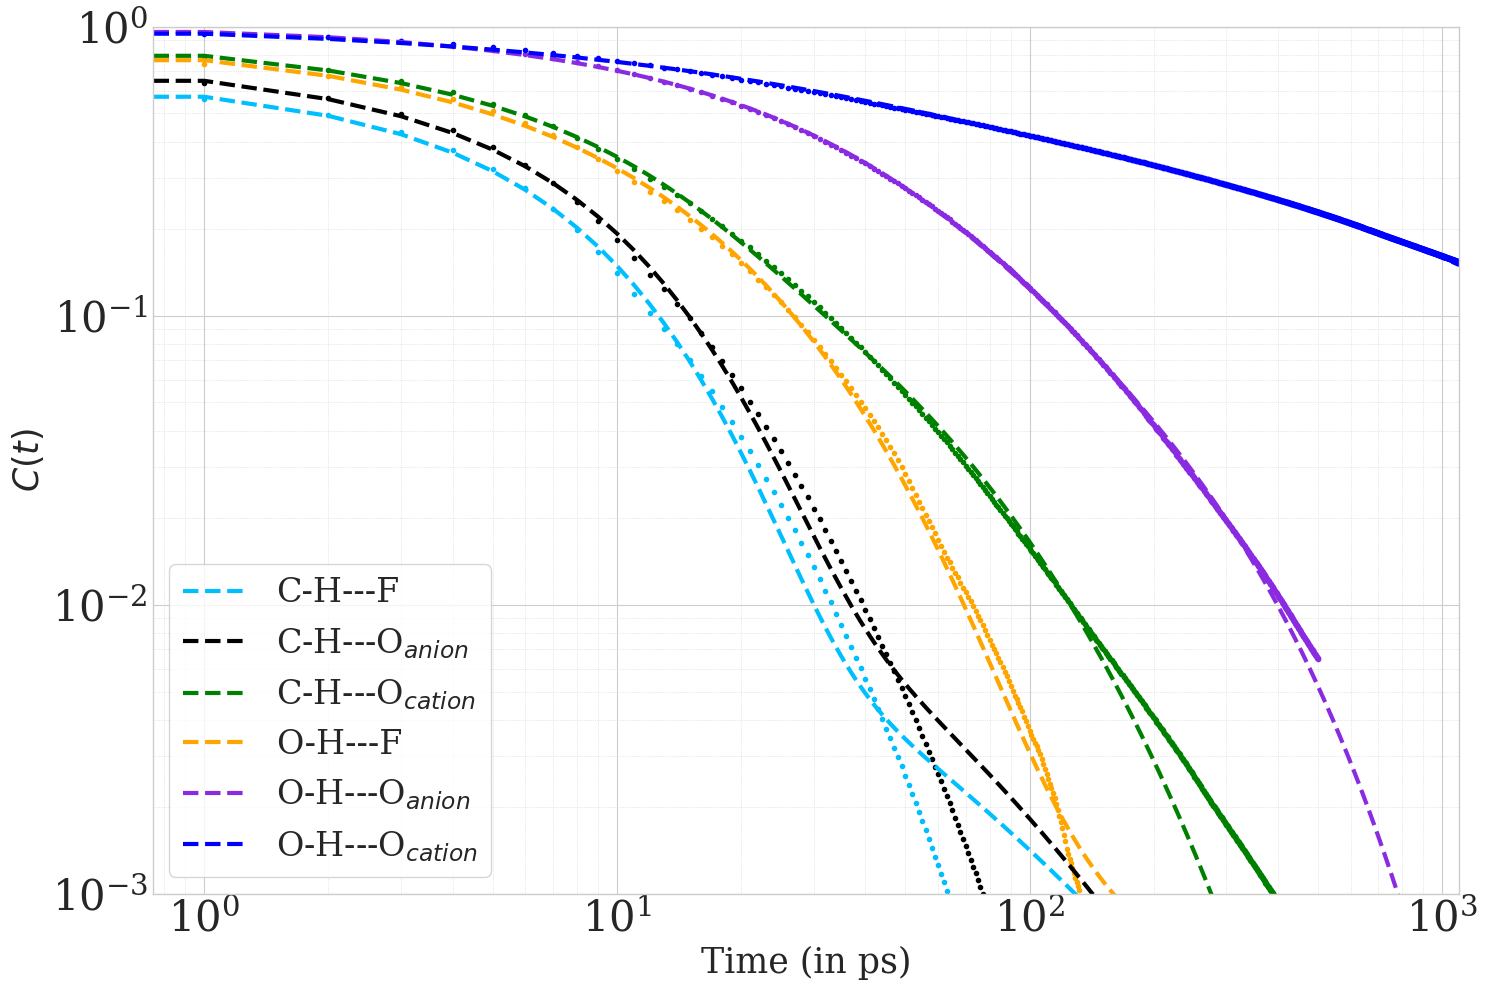

In [89]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(111)
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
ax.scatter(corr_H_Bond_C_H_F[0, :], corr_H_Bond_C_H_F[1, :], marker='.', color='deepskyblue')
ax.plot(corr_H_Bond_O_H_O_cation[0, :], fit_corr_C_H_F, linestyle='dashed', linewidth=3, label=r'C-H---F', color='deepskyblue')
ax.scatter(corr_H_Bond_C_H_O_anion[0, :], corr_H_Bond_C_H_O_anion[1, :], marker='.', color='black')
ax.plot(corr_H_Bond_O_H_O_cation[0, :], fit_corr_C_H_O_anion, linestyle='dashed', linewidth=3, label=r'C-H---O$_{anion}$', color='black')
ax.scatter(corr_H_Bond_C_H_O_cation[0, :], corr_H_Bond_C_H_O_cation[1, :], marker='.', color='green')
ax.plot(corr_H_Bond_O_H_O_cation[0, :], fit_corr_C_H_O_cation, linestyle='dashed', linewidth=3, label=r'C-H---O$_{cation}$', color='green')
ax.scatter(corr_H_Bond_O_H_F[0, :], corr_H_Bond_O_H_F[1, :], marker='.', color='orange')
ax.plot(corr_H_Bond_O_H_O_cation[0, :], fit_corr_O_H_F, linestyle='dashed', linewidth=3, label=r'O-H---F', color='orange')
ax.scatter(corr_H_Bond_O_H_O_anion[0, :], corr_H_Bond_O_H_O_anion[1, :], marker='.', color='blueviolet')
ax.plot(corr_H_Bond_O_H_O_cation[0, :], fit_corr_O_H_O_anion, linestyle='dashed', linewidth=3, label=r'O-H---O$_{anion}$', color='blueviolet')
ax.scatter(corr_H_Bond_O_H_O_cation[0, :], corr_H_Bond_O_H_O_cation[1, :], marker='.', color='blue')
ax.plot(corr_H_Bond_O_H_O_cation[0, :], fit_corr_O_H_O_cation, linestyle='dashed', linewidth=3, label=r'O-H---O$_{cation}$', color='blue')

plt.xlabel(r"Time (in ps)", fontsize=25)
plt.ylabel(r"$C(t)$", fontsize=25)
plt.grid(visible=True, axis='both')
plt.grid(visible=True, which = 'minor', axis='both', color='lightgray', linestyle=':', linewidth=0.5)
plt.minorticks_on()
plt.legend(fontsize=24, frameon = True, loc = 'lower left')
ax.set_xlim(0.75, 1100)
ax.set_ylim(10e-4, 1)
ax.set_xscale('log')
ax.set_yscale('log')
fig.tight_layout()
plt.savefig('./cation2/corr_il2_log.png')
plt.show()

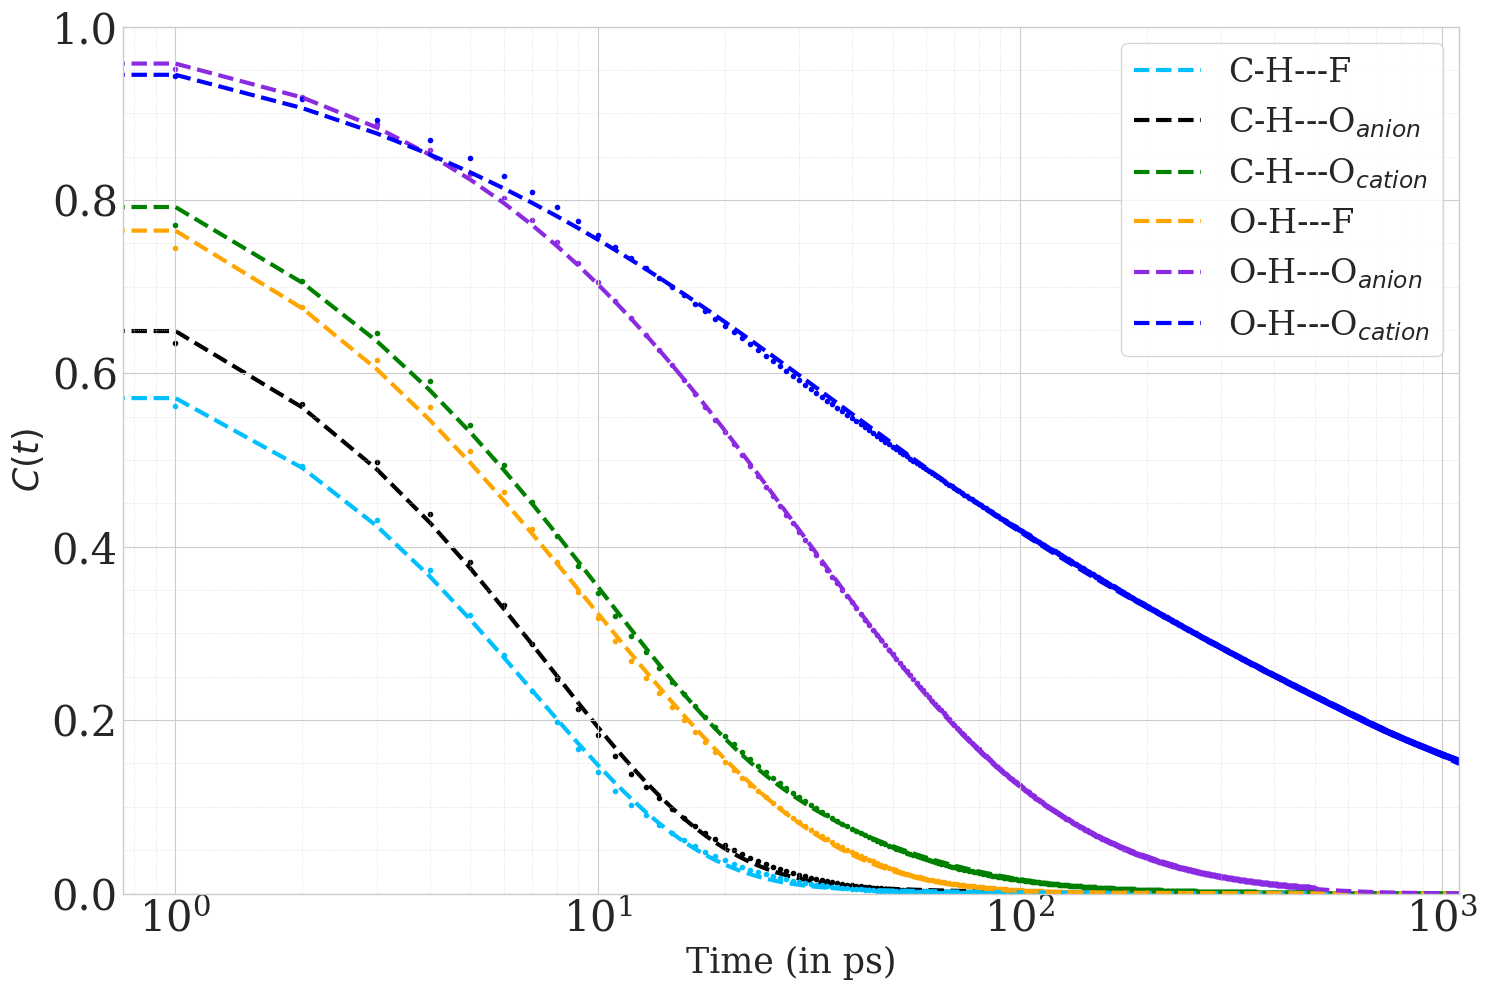

In [96]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(111)
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
ax.scatter(corr_H_Bond_C_H_F[0, :], corr_H_Bond_C_H_F[1, :], marker='.', color='deepskyblue')
ax.plot(corr_H_Bond_O_H_O_cation[0, :], fit_corr_C_H_F, linestyle='dashed', linewidth=3, label=r'C-H---F', color='deepskyblue')
ax.scatter(corr_H_Bond_C_H_O_anion[0, :], corr_H_Bond_C_H_O_anion[1, :], marker='.', color='black', zorder=0)
ax.plot(corr_H_Bond_O_H_O_cation[0, :], fit_corr_C_H_O_anion, linestyle='dashed', linewidth=3, label=r'C-H---O$_{anion}$', color='black', zorder=0)
ax.scatter(corr_H_Bond_C_H_O_cation[0, :], corr_H_Bond_C_H_O_cation[1, :], marker='.', color='green')
ax.plot(corr_H_Bond_O_H_O_cation[0, :], fit_corr_C_H_O_cation, linestyle='dashed', linewidth=3, label=r'C-H---O$_{cation}$', color='green')
ax.scatter(corr_H_Bond_O_H_F[0, :], corr_H_Bond_O_H_F[1, :], marker='.', color='orange')
ax.plot(corr_H_Bond_O_H_O_cation[0, :], fit_corr_O_H_F, linestyle='dashed', linewidth=3, label=r'O-H---F', color='orange')
ax.scatter(corr_H_Bond_O_H_O_anion[0, :], corr_H_Bond_O_H_O_anion[1, :], marker='.', color='blueviolet', zorder=0)
ax.plot(corr_H_Bond_O_H_O_cation[0, :], fit_corr_O_H_O_anion, linestyle='dashed', linewidth=3, label=r'O-H---O$_{anion}$', color='blueviolet')
ax.scatter(corr_H_Bond_O_H_O_cation[0, :], corr_H_Bond_O_H_O_cation[1, :], marker='.', color='blue')
ax.plot(corr_H_Bond_O_H_O_cation[0, :], fit_corr_O_H_O_cation, linestyle='dashed', linewidth=3, label=r'O-H---O$_{cation}$', color='blue')

plt.xlabel(r"Time (in ps)", fontsize=25)
plt.ylabel(r"$C(t)$", fontsize=25)
plt.grid(visible=True, axis='both')
plt.grid(visible=True, which = 'minor', axis='both', color='lightgray', linestyle=':', linewidth=0.5)
plt.minorticks_on()
plt.legend(fontsize=24, frameon = True, loc = 'upper right')
ax.set_xlim(0.75, 1100)
ax.set_ylim(0, 1)
ax.set_xscale('log')
#ax.set_yscale('log
fig.tight_layout()
plt.savefig('./cation2/corr_il2.png')
plt.show()

In [70]:
print(np.trapz(corr_H_Bond_C_H_F[1, :]))
print(np.trapz(corr_H_Bond_C_H_O_anion[1, :]))
print(np.trapz(corr_H_Bond_C_H_O_cation[1, :]))
print(np.trapz(corr_H_Bond_O_H_F[1, :]))
print(np.trapz(corr_H_Bond_O_H_O_anion[1, :]))
print(np.trapz(corr_H_Bond_O_H_O_cation[1, :]))

4.7790855340662715
5.886853569402765
13.860031682349662
10.378042614962746
47.74123441588876
284.14892837095954


In [6]:
corr_H_Bond_C_H_F=np.genfromtxt('./il1/h_bond_correlation/h_bond_C_H_F.csv', delimiter=' ')
print(corr_H_Bond_C_H_F.shape)
print(corr_H_Bond_C_H_F.dtype)
corr_H_Bond_C_H_O_cation=np.genfromtxt('./il1/h_bond_correlation/h_bond_C_H_O_cation.csv', delimiter=' ')
print(corr_H_Bond_C_H_O_cation.shape)
print(corr_H_Bond_C_H_O_cation.dtype)

corr_H_Bond_O_H_F=np.genfromtxt('./il1/h_bond_correlation/h_bond_O_H_F.csv', delimiter=' ')
print(corr_H_Bond_O_H_F.shape)
print(corr_H_Bond_O_H_F.dtype)
corr_H_Bond_O_H_O_cation=np.genfromtxt('./il1/h_bond_correlation/h_bond_O_H_O_cation.csv', delimiter=' ')
print(corr_H_Bond_O_H_O_cation.shape)
print(corr_H_Bond_O_H_O_cation.dtype)

(2, 101)
float64
(2, 201)
float64
(2, 501)
float64
(2, 1101)
float64


/tmp/ipykernel_6060/648112797.py:16: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 1100)


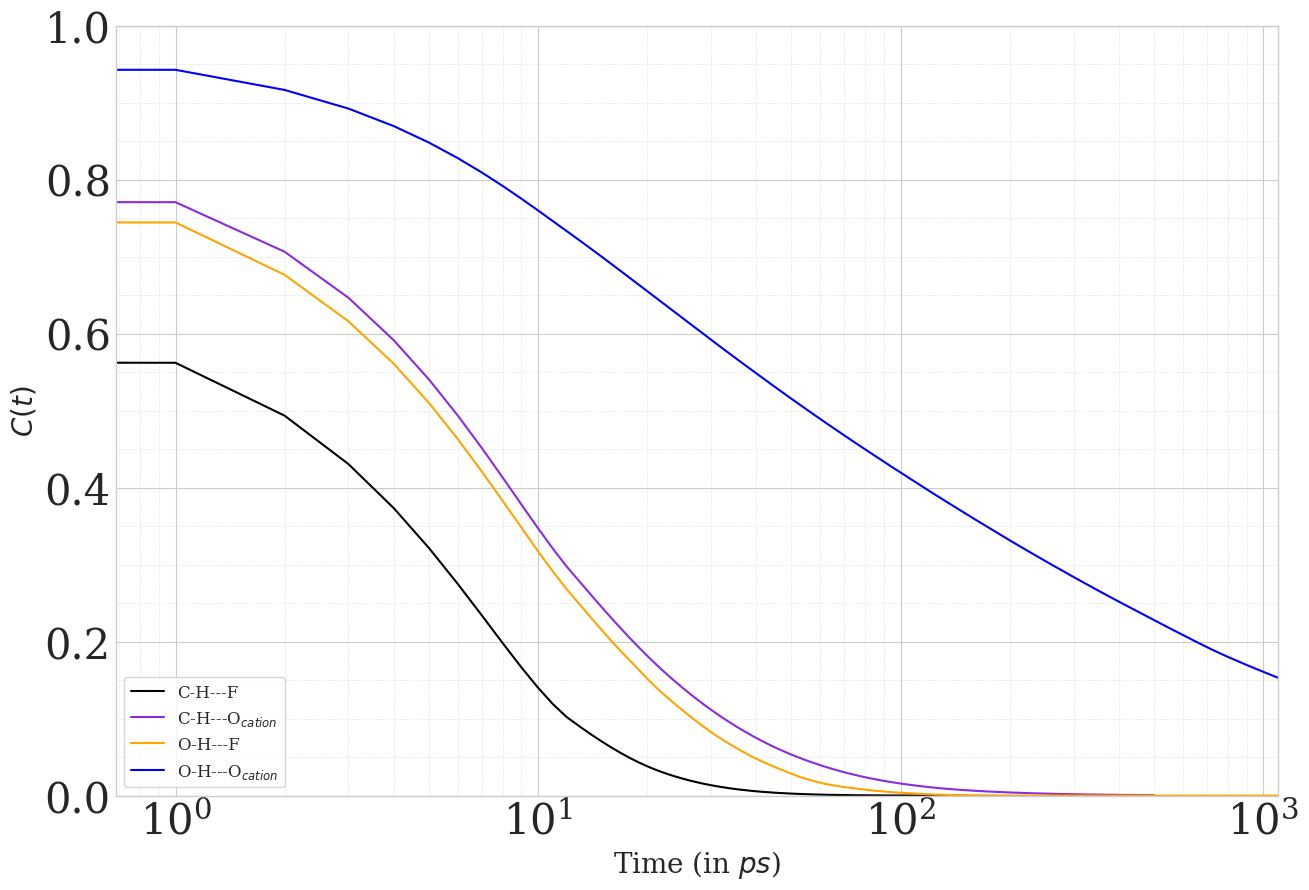

In [85]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(111)
ax.semilogx(corr_H_Bond_C_H_F[0, :], corr_H_Bond_C_H_F[1, :], linestyle='solid', color='black', label=r'C-H---F')
#ax.semilogx(corr_H_Bond_C_H_O_anion[0, :], corr_H_Bond_C_H_O_anion[1, :], linestyle='solid', color='cyan', label=r'C-H---O$_{anion}$')
ax.semilogx(corr_H_Bond_C_H_O_cation[0, :], corr_H_Bond_C_H_O_cation[1, :], linestyle='solid', color='blueviolet', label=r'C-H---O$_{cation}$')
ax.semilogx(corr_H_Bond_O_H_F[0, :], corr_H_Bond_O_H_F[1, :], linestyle='solid', color='orange', label=r'O-H---F')
#ax.semilogx(corr_H_Bond_O_H_O_anion[0, :], corr_H_Bond_O_H_O_anion[1, :], linestyle='solid', color='green', label=r'O-H---O$_{anion}$')
ax.semilogx(corr_H_Bond_O_H_O_cation[0, :], corr_H_Bond_O_H_O_cation[1, :], linestyle='solid', color='blue', label=r'O-H---O$_{cation}$')

plt.xlabel(r"Time (in $ps$)", fontsize=20)
plt.ylabel(r"$C(t)$", fontsize=20)
plt.grid(visible=True, axis='both')
plt.grid(visible=True, which = 'minor', axis='both', color='lightgray', linestyle=':', linewidth=0.5)
plt.minorticks_on()
plt.legend(fontsize=12, frameon = True, loc = 'lower left')
ax.set_xlim(0, 1100)
ax.set_ylim(0, 1)
plt.show()

In [86]:
params = np.zeros((4, 6))
params[0, :], fit_corr_C_H_F = fit_biexponential(corr_H_Bond_C_H_F[0, :], corr_H_Bond_O_H_O_cation[0, :], corr_H_Bond_C_H_F[1, :])
params[1, :], fit_corr_C_H_O_cation = fit_biexponential(corr_H_Bond_C_H_O_cation[0, :], corr_H_Bond_O_H_O_cation[0, :], corr_H_Bond_C_H_O_cation[1, :])
params[2, :], fit_corr_O_H_F = fit_biexponential(corr_H_Bond_O_H_F[0, :], corr_H_Bond_O_H_O_cation[0, :], corr_H_Bond_O_H_F[1, :])
params[3, :], fit_corr_O_H_O_cation = fit_biexponential(corr_H_Bond_O_H_O_cation[0, :], corr_H_Bond_O_H_O_cation[0, :], corr_H_Bond_O_H_O_cation[1, :])
print(params)

[[4.27383834e-01 5.73032686e-02 2.33417381e-01 5.72474770e-01 7.11480414e+00 1.10433698e+00]
 [2.67958574e-01 1.06056368e+01 1.28643639e+00 7.28142839e-01 8.74527303e+00 5.46595164e-01]
 [8.75393215e-01 9.74508728e+00 7.88504687e-01 1.24206352e-01 8.63524515e-02 2.12133252e-01]
 [3.83820856e-01 2.36703491e+01 6.49634219e-01 6.50671911e-01 4.52510616e+02 4.34564908e-01]]


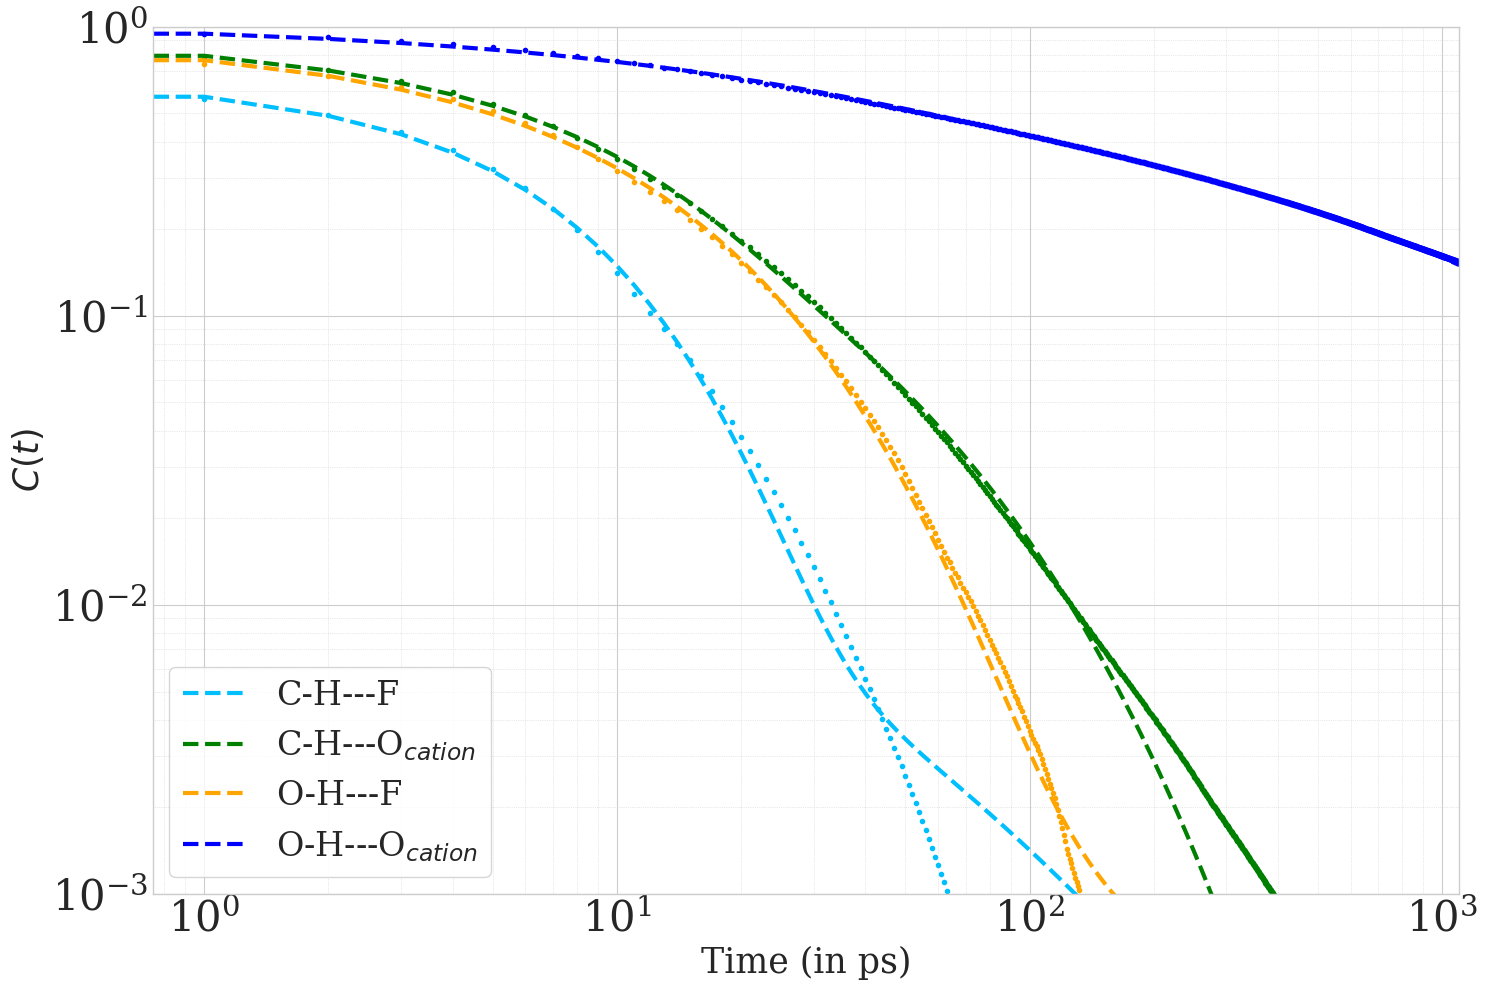

In [90]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(111)
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
ax.scatter(corr_H_Bond_C_H_F[0, :], corr_H_Bond_C_H_F[1, :], marker='.', color='deepskyblue')
ax.plot(corr_H_Bond_O_H_O_cation[0, :], fit_corr_C_H_F, linestyle='dashed', linewidth=3, label=r'C-H---F', color='deepskyblue')
ax.scatter(corr_H_Bond_C_H_O_cation[0, :], corr_H_Bond_C_H_O_cation[1, :], marker='.', color='green')
ax.plot(corr_H_Bond_O_H_O_cation[0, :], fit_corr_C_H_O_cation, linestyle='dashed', linewidth=3, label=r'C-H---O$_{cation}$', color='green')
ax.scatter(corr_H_Bond_O_H_F[0, :], corr_H_Bond_O_H_F[1, :], marker='.', color='orange')
ax.plot(corr_H_Bond_O_H_O_cation[0, :], fit_corr_O_H_F, linestyle='dashed', linewidth=3, label=r'O-H---F', color='orange')
ax.scatter(corr_H_Bond_O_H_O_cation[0, :], corr_H_Bond_O_H_O_cation[1, :], marker='.', color='blue')
ax.plot(corr_H_Bond_O_H_O_cation[0, :], fit_corr_O_H_O_cation, linestyle='dashed', linewidth=3, label=r'O-H---O$_{cation}$', color='blue')

plt.xlabel(r"Time (in ps)", fontsize=25)
plt.ylabel(r"$C(t)$", fontsize=25)
plt.grid(visible=True, axis='both')
plt.grid(visible=True, which = 'minor', axis='both', color='lightgray', linestyle=':', linewidth=0.5)
plt.minorticks_on()
plt.legend(fontsize=24, frameon = True, loc = 'lower left')
ax.set_xlim(0.75, 1100)
ax.set_ylim(10e-4, 1)
ax.set_xscale('log')
ax.set_yscale('log')
fig.tight_layout()
plt.savefig('./cation/corr_il1_log.png')
plt.show()

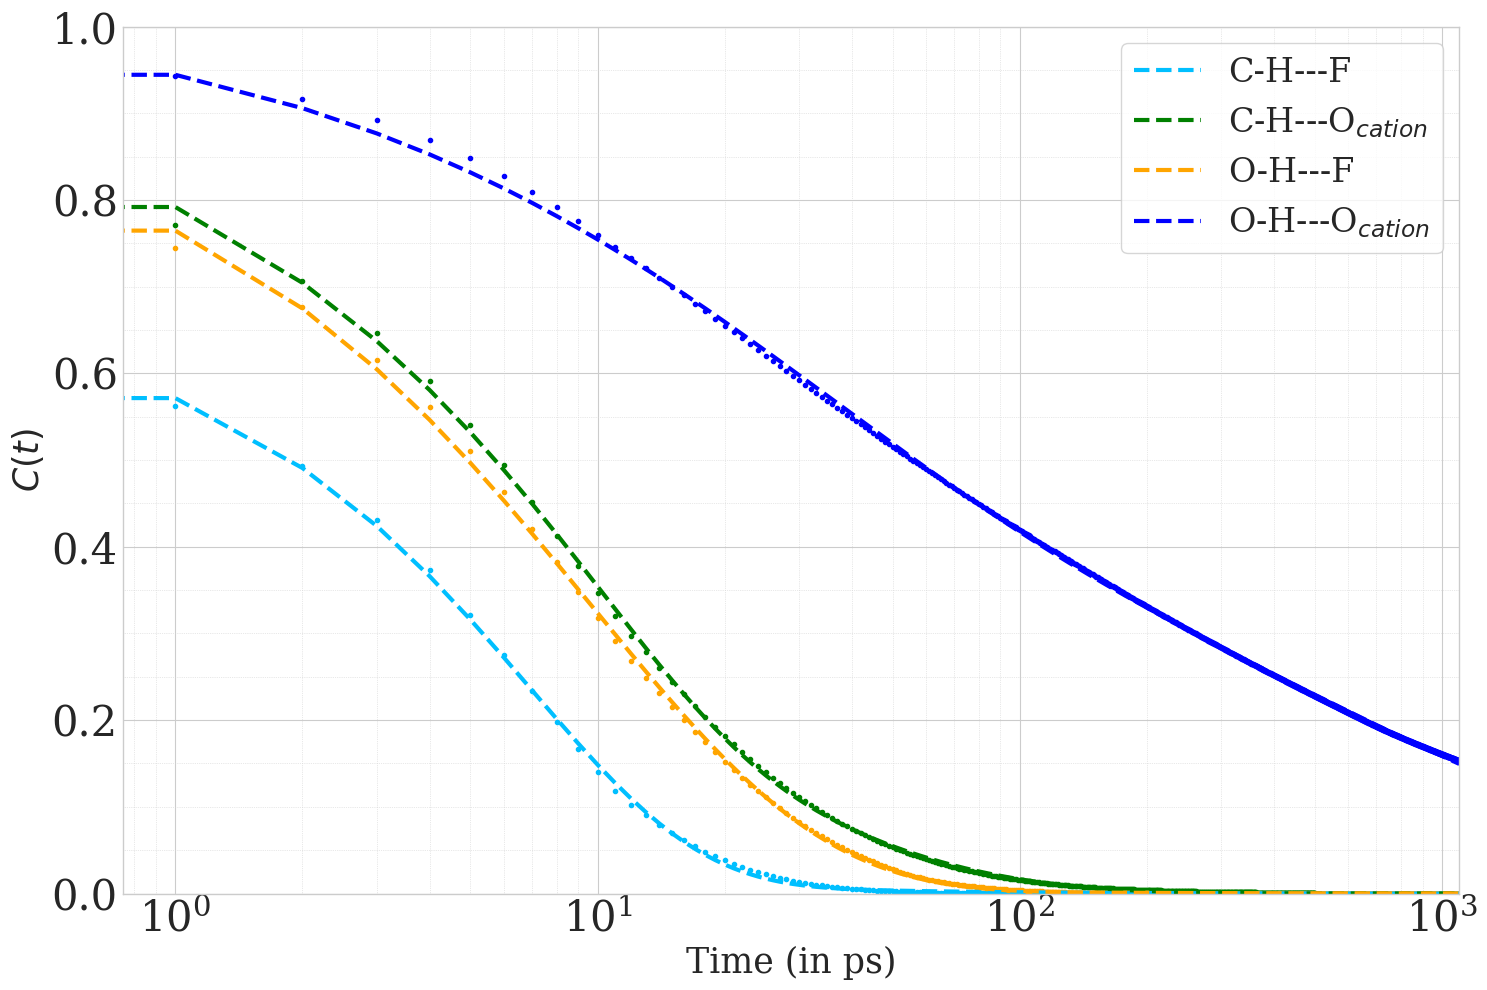

In [92]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(111)
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
ax.scatter(corr_H_Bond_C_H_F[0, :], corr_H_Bond_C_H_F[1, :], marker='.', color='deepskyblue')
ax.plot(corr_H_Bond_O_H_O_cation[0, :], fit_corr_C_H_F, linestyle='dashed', linewidth=3, label=r'C-H---F', color='deepskyblue')
ax.scatter(corr_H_Bond_C_H_O_cation[0, :], corr_H_Bond_C_H_O_cation[1, :], marker='.', color='green')
ax.plot(corr_H_Bond_O_H_O_cation[0, :], fit_corr_C_H_O_cation, linestyle='dashed', linewidth=3, label=r'C-H---O$_{cation}$', color='green')
ax.scatter(corr_H_Bond_O_H_F[0, :], corr_H_Bond_O_H_F[1, :], marker='.', color='orange')
ax.plot(corr_H_Bond_O_H_O_cation[0, :], fit_corr_O_H_F, linestyle='dashed', linewidth=3, label=r'O-H---F', color='orange')
ax.scatter(corr_H_Bond_O_H_O_cation[0, :], corr_H_Bond_O_H_O_cation[1, :], marker='.', color='blue')
ax.plot(corr_H_Bond_O_H_O_cation[0, :], fit_corr_O_H_O_cation, linestyle='dashed', linewidth=3, label=r'O-H---O$_{cation}$', color='blue')

plt.xlabel(r"Time (in ps)", fontsize=25)
plt.ylabel(r"$C(t)$", fontsize=25)
plt.grid(visible=True, axis='both')
plt.grid(visible=True, which = 'minor', axis='both', color='lightgray', linestyle=':', linewidth=0.5)
plt.minorticks_on()
plt.legend(fontsize=24, frameon = True, loc = 'upper right')
ax.set_xlim(0.75, 1100)
ax.set_ylim(0, 1)
ax.set_xscale('log')
#ax.set_yscale('log
fig.tight_layout()
plt.savefig('./cation/corr_il1.png')
plt.show()

In [7]:
t, vel_acc = np.loadtxt("./il2/vel_acc_funcs/isolated_cation/vel_acc_cation0.xvg", comments=["#", "@", "&"], unpack=True)
print(t.shape)
print(vel_acc.shape)

vel_acc_isolated_cation = np.zeros((20, vel_acc.shape[0]))
vel_acc_cation_il1 = np.zeros((20, vel_acc.shape[0]))
vel_acc_cation_il2 = np.zeros((20, vel_acc.shape[0]))
vel_acc_cation_H0B = np.zeros((20, vel_acc.shape[0]))
vel_acc_cation_H0I = np.zeros((20, vel_acc.shape[0]))
for i in range(20):
    _, vel_acc_isolated_cation[i, :] = np.loadtxt(f"./il2/vel_acc_funcs/isolated_cation/vel_acc_cation{i}.xvg", comments=["#", "@", "&"], unpack=True)
    _, vel_acc_cation_il2[i, :] = np.loadtxt(f"./il2/vel_acc_funcs/ensemble_cation/vel_acc_cation{i}.xvg", comments=["#", "@", "&"], unpack=True)
    _, vel_acc_cation_H0B[i, :] = np.loadtxt(f"./il2/vel_acc_funcs/imidazolium_hydrogen/vel_acc_H0B{i}.xvg", comments=["#", "@", "&"], unpack=True)
    _, vel_acc_cation_H0I[i, :] = np.loadtxt(f"./il2/vel_acc_funcs/carboxylic_hydrogen/vel_acc_H0I{i}.xvg", comments=["#", "@", "&"], unpack=True)

(250001,)
(250001,)


In [3]:
velAcc_isolated_cation = np.mean(vel_acc_isolated_cation, axis = 0)
velAcc_cation_il1 = np.mean(vel_acc_cation_il1, axis = 0)
velAcc_cation_il2 = np.mean(vel_acc_cation_il2, axis = 0)
velAcc_cation_H0B = np.mean(vel_acc_cation_H0B, axis = 0)
velAcc_cation_H0I = np.mean(vel_acc_cation_H0I, axis = 0)
print(velAcc_isolated_cation.shape)
print(velAcc_cation_il1.shape)
print(velAcc_cation_il2.shape)
print(velAcc_cation_H0B.shape)
print(velAcc_cation_H0I.shape)

(250001,)
(250001,)
(250001,)
(250001,)
(250001,)


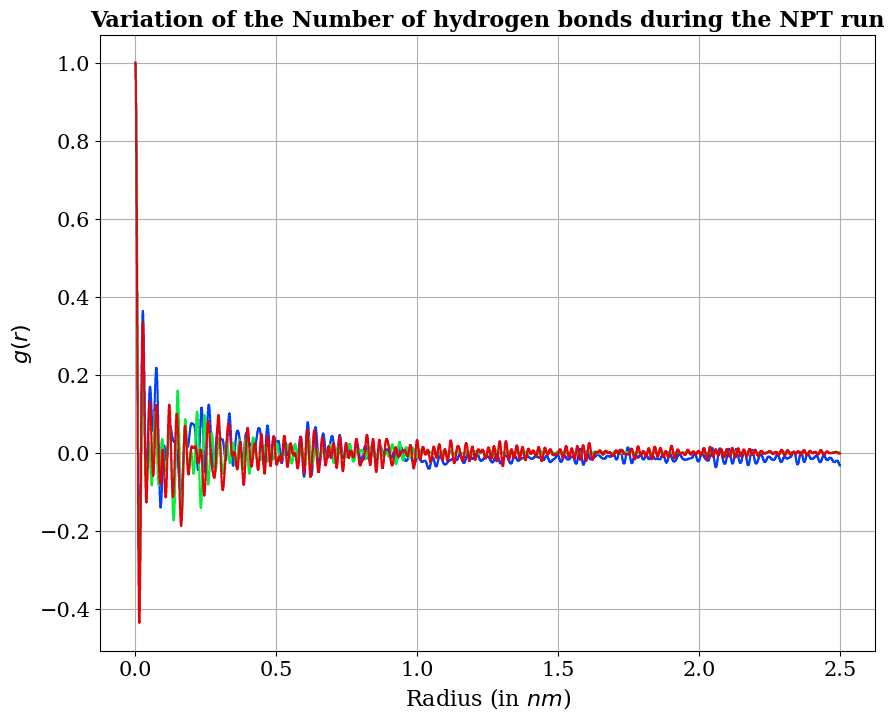

In [40]:
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

ax.plot(t, velAcc_isolated_cation, linestyle = 'solid')
ax.plot(t, velAcc_cation_il1, linestyle = 'solid')
ax.plot(t, velAcc_cation_il2, linestyle = 'solid')
'''
ax.loglog(corr_H_Bond_C_H_F[0, :], corr_H_Bond_C_H_F[1, :], linestyle='solid', label=r'C-H---F')
ax.loglog(corr_H_Bond_C_H_O_cation[0, :], corr_H_Bond_C_H_O_cation[1, :], linestyle='solid', label=r'C-H---O')
ax.loglog(corr_H_Bond_C_H_O_anion[0, :], corr_H_Bond_C_H_O_anion[1, :], linestyle='solid', label=r'C-H---O_')
ax.loglog(corr_H_Bond_O_H_F[0, :], corr_H_Bond_O_H_F[1, :], linestyle='solid', label=r'O-H---F')
ax.loglog(corr_H_Bond_O_H_O_cation[0, :], corr_H_Bond_O_H_O_cation[1, :], linestyle='solid', label=r'O-H---O')
ax.loglog(corr_H_Bond_O_H_O_anion[0, :], corr_H_Bond_O_H_O_anion[1, :], linestyle='solid', label=r'O-H---O')
'''

plt.xlabel(r"Radius (in $nm$)", fontsize=16)
plt.ylabel(r"$g(r)$", fontsize=16)
plt.title("Variation of the Number of hydrogen bonds during the NPT run", weight="bold", fontsize=16)
plt.grid(visible=True, axis='both')
#plt.legend(fontsize=12)
plt.show()

In [4]:
vdos_isolated_cation = np.fft.rfft(velAcc_isolated_cation)
vdos_cation_il1 = np.fft.rfft(velAcc_cation_il1)
vdos_cation_il2 = np.fft.rfft(velAcc_cation_il2)
vdos_cation_H0B = np.fft.rfft(velAcc_cation_H0B)
vdos_cation_H0I = np.fft.rfft(velAcc_cation_H0I)
freqs = np.fft.rfftfreq(velAcc_isolated_cation.shape[0], 0.0001)/3*10e2*2

vdos_isolated_cation[:50] = vdos_isolated_cation[:50]*np.linspace(0.1, 1.0, 50) 

print(vdos_isolated_cation.shape)
print(vdos_cation_il1.shape)
print(vdos_cation_il2.shape)
print(vdos_cation_H0B.shape)
print(vdos_cation_H0I.shape)
print(freqs.shape)

(125001,)
(125001,)
(125001,)
(125001,)
(125001,)
(125001,)


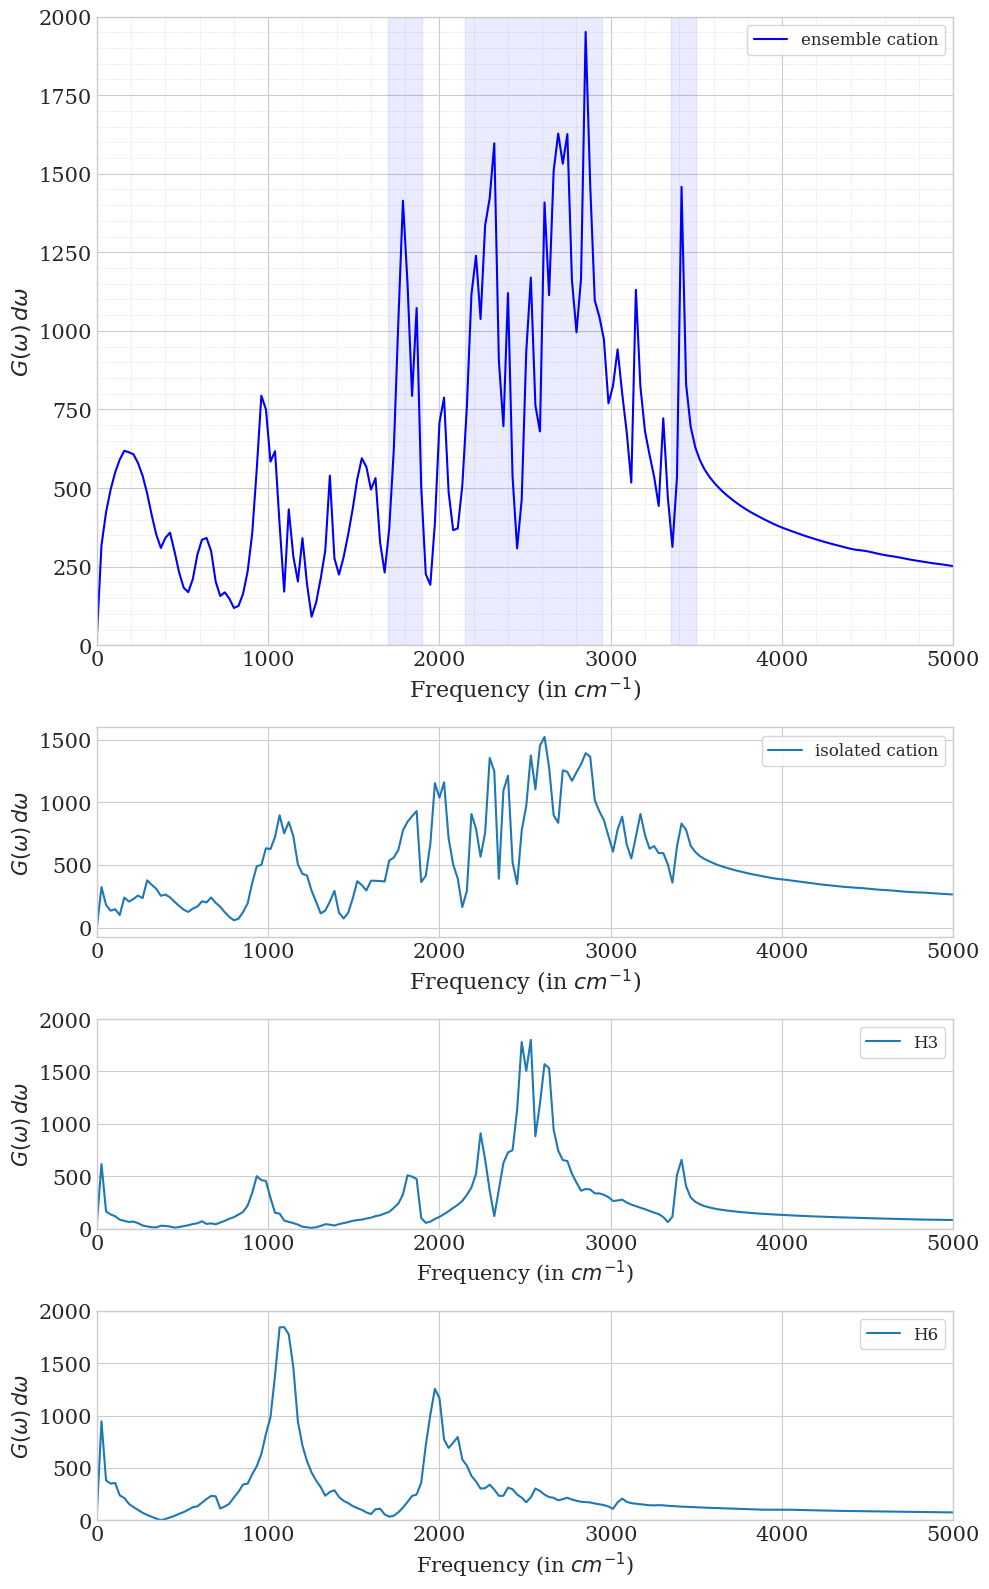

In [13]:
fig, axs = plt.subplots(4, 1, figsize = (10, 16), gridspec_kw={'height_ratios': [3, 1, 1, 1]})

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

axs[0].plot(freqs, 0.95*np.abs(vdos_cation_il2), linestyle = 'solid', color = 'blue', label = "ensemble cation")
axs[0].set_xlim(0, 5*10e2)
axs[0].set_ylim(0, 2000)
axs[0].set_xlabel(r"Frequency (in $cm^{-1}$)", fontsize = 16)
axs[0].set_ylabel(r"$G(\omega)\,d\omega$", fontsize = 16)
axs[0].grid(visible=True, axis='both')
axs[0].grid(visible=True, which = 'minor', axis='both', color='lightgray', linestyle=':', linewidth=0.5)
axs[0].minorticks_on()
axs[0].legend(fontsize=12, frameon = True)
axs[0].axvspan(2150, 2950, alpha = 0.08, color = 'blue')
axs[0].axvspan(1700, 1900, alpha = 0.08, color = 'blue')
axs[0].axvspan(3350, 3500, alpha = 0.08, color = 'blue')

axs[1].plot(freqs, np.abs(vdos_isolated_cation), linestyle = 'solid', label = "isolated cation")
axs[1].set_xlim(0, 5*10e2)
axs[1].set_xlabel(r"Frequency (in $cm^{-1}$)", fontsize = 16)
axs[1].set_ylabel(r"$G(\omega)\,d\omega$", fontsize = 15)
axs[1].grid(visible=True, axis='both')
axs[1].legend(fontsize=12, frameon = True)

axs[2].plot(freqs, 0.3*np.abs(vdos_cation_H0B), linestyle = 'solid', label = "H3")
axs[2].set_xlim(0, 5*10e2)
axs[2].set_ylim(0, 2000)
axs[2].set_xlabel(r"Frequency (in $cm^{-1}$)", fontsize = 15)
axs[2].set_ylabel(r"$G(\omega)\,d\omega$", fontsize = 15)
axs[2].grid(visible=True, axis='both')
axs[2].legend(fontsize=12, frameon = True)

axs[3].plot(freqs, 0.3*np.abs(vdos_cation_H0I), linestyle = 'solid', label = "H6")
axs[3].set_xlim(0, 5*10e2)
axs[3].set_ylim(0, 2000)
axs[3].set_xlabel(r"Frequency (in $cm^{-1}$)", fontsize = 15)
axs[3].set_ylabel(r"$G(\omega)\,d\omega$", fontsize = 15)
axs[3].grid(visible=True, axis='both')
axs[3].legend(fontsize=12, frameon = True)

fig.tight_layout()
plt.savefig('./cation2/vdos_il2.png')
plt.show()


In [8]:
t, vel_acc = np.loadtxt("./il1/vel_acc_funcs/isolated_cation/vel_acc_cation0.xvg", comments=["#", "@", "&"], unpack=True)
print(t.shape)
print(vel_acc.shape)

vel_acc_isolated_cation = np.zeros((20, vel_acc.shape[0]))
vel_acc_cation_il1 = np.zeros((20, vel_acc.shape[0]))
vel_acc_cation_H0B = np.zeros((20, vel_acc.shape[0]))
vel_acc_cation_H0I = np.zeros((20, vel_acc.shape[0]))
for i in range(20):
    _, vel_acc_isolated_cation[i, :] = np.loadtxt(f"./il1/vel_acc_funcs/isolated_cation/vel_acc_cation{i}.xvg", comments=["#", "@", "&"], unpack=True)
    _, vel_acc_cation_il1[i, :] = np.loadtxt(f"./il1/vel_acc_funcs/ensemble_cation/vel_acc_cation{i}.xvg", comments=["#", "@", "&"], unpack=True)
    _, vel_acc_cation_H0B[i, :] = np.loadtxt(f"./il1/vel_acc_funcs/imidazolium_hydrogen/vel_acc_H0H{i}.xvg", comments=["#", "@", "&"], unpack=True)
    _, vel_acc_cation_H0I[i, :] = np.loadtxt(f"./il1/vel_acc_funcs/carboxylic_hydrogen/vel_acc_H0I{i}.xvg", comments=["#", "@", "&"], unpack=True)

(250001,)
(250001,)


In [5]:
velAcc_isolated_cation = np.mean(vel_acc_isolated_cation, axis = 0)
velAcc_cation_il1 = np.mean(vel_acc_cation_il1, axis = 0)
velAcc_cation_H0B = np.mean(vel_acc_cation_H0B, axis = 0)
velAcc_cation_H0I = np.mean(vel_acc_cation_H0I, axis = 0)
print(velAcc_isolated_cation.shape)
print(velAcc_cation_il1.shape)
print(velAcc_cation_H0B.shape)
print(velAcc_cation_H0I.shape)

(250001,)
(250001,)
(250001,)
(250001,)


In [6]:
vdos_isolated_cation = np.fft.rfft(velAcc_isolated_cation)
vdos_cation_il1 = np.fft.rfft(velAcc_cation_il1)
vdos_cation_H0B = np.fft.rfft(velAcc_cation_H0B)
vdos_cation_H0I = np.fft.rfft(velAcc_cation_H0I)
freqs = np.fft.rfftfreq(velAcc_isolated_cation.shape[0], 0.0001)/3*10e2*2

vdos_isolated_cation[:50] = vdos_isolated_cation[:50]*np.linspace(0.1, 1.0, 50) 

print(vdos_isolated_cation.shape)
print(vdos_cation_il1.shape)
print(vdos_cation_H0B.shape)
print(vdos_cation_H0I.shape)
print(freqs.shape)

(125001,)
(125001,)
(125001,)
(125001,)
(125001,)


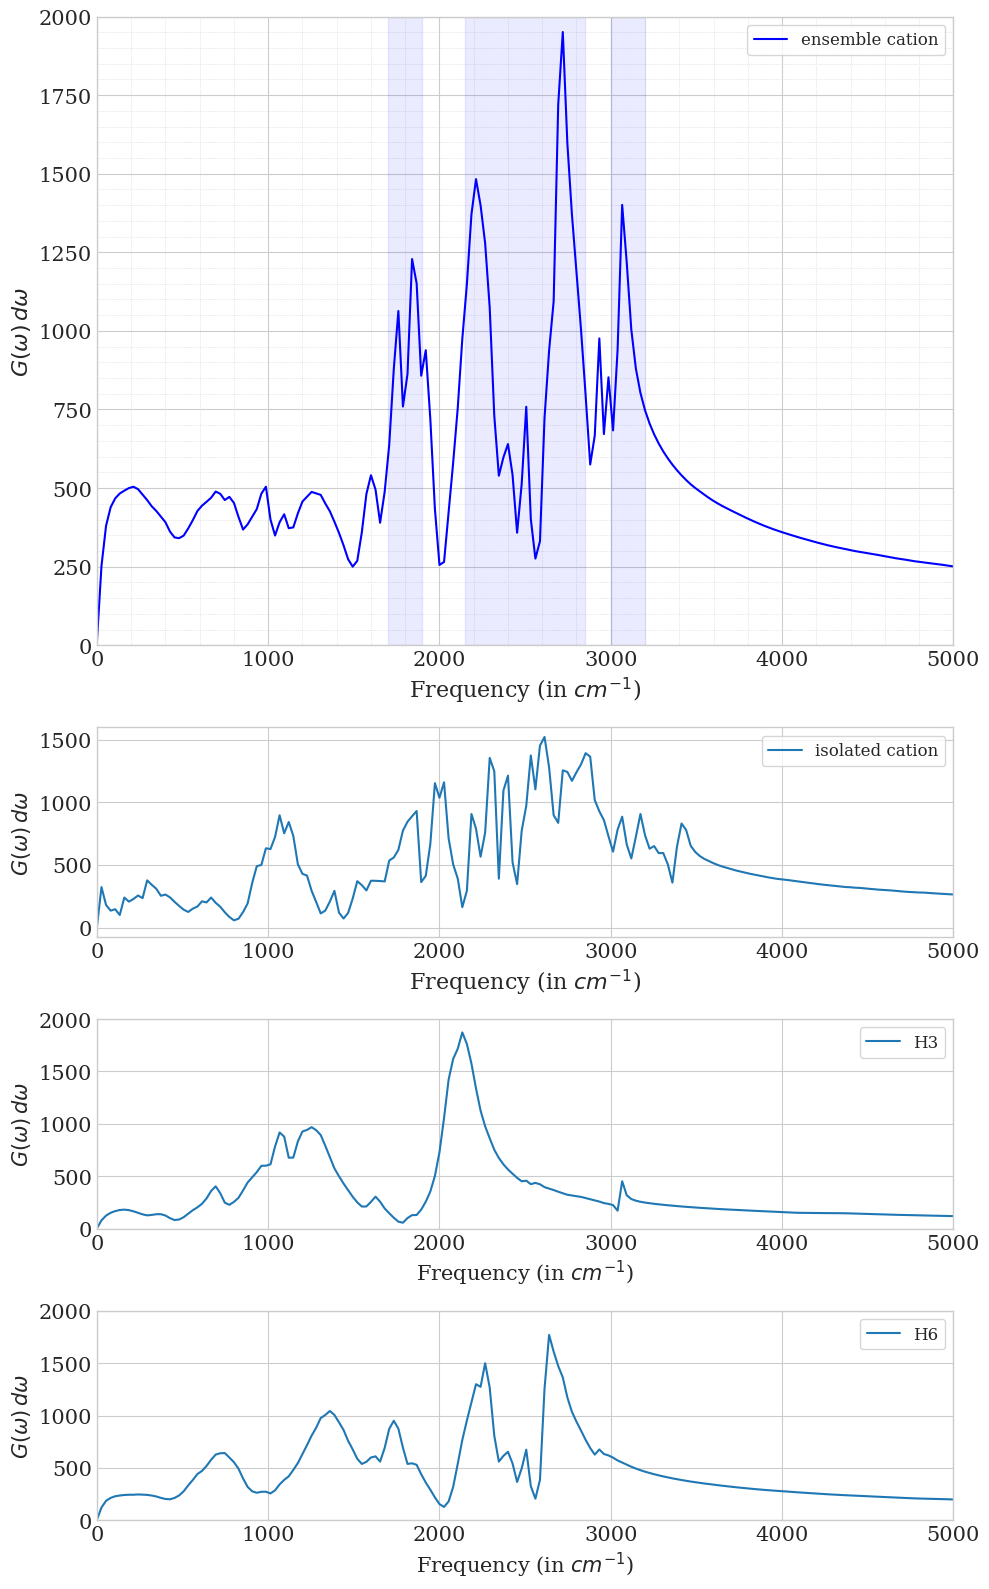

In [14]:
fig, axs = plt.subplots(4, 1, figsize = (10, 16), gridspec_kw={'height_ratios': [3, 1, 1, 1]})

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

axs[0].plot(freqs, 0.98*np.abs(vdos_cation_il1), linestyle = 'solid', color = 'blue', label = "ensemble cation")
axs[0].set_xlim(0, 5*10e2)
axs[0].set_ylim(0, 2000)
axs[0].set_xlabel(r"Frequency (in $cm^{-1}$)", fontsize = 16)
axs[0].set_ylabel(r"$G(\omega)\,d\omega$", fontsize = 16)
axs[0].grid(visible=True, axis='both')
axs[0].grid(visible=True, which = 'minor', axis='both', color='lightgray', linestyle=':', linewidth=0.5)
axs[0].minorticks_on()
axs[0].legend(fontsize=12, frameon = True)
axs[0].axvspan(2150, 2850, alpha = 0.08, color = 'blue')
axs[0].axvspan(1700, 1900, alpha = 0.08, color = 'blue')
axs[0].axvspan(3000, 3200, alpha = 0.08, color = 'blue')

axs[1].plot(freqs, np.abs(vdos_isolated_cation), linestyle = 'solid', label = "isolated cation")
axs[1].set_xlim(0, 5*10e2)
axs[1].set_xlabel(r"Frequency (in $cm^{-1}$)", fontsize = 16)
axs[1].set_ylabel(r"$G(\omega)\,d\omega$", fontsize = 15)
axs[1].grid(visible=True, axis='both')
axs[1].legend(fontsize=12, frameon = True)

axs[2].plot(freqs, 0.5*np.abs(vdos_cation_H0B), linestyle = 'solid', label = "H3")
axs[2].set_xlim(0, 5*10e2)
axs[2].set_ylim(0, 2000)
axs[2].set_xlabel(r"Frequency (in $cm^{-1}$)", fontsize = 15)
axs[2].set_ylabel(r"$G(\omega)\,d\omega$", fontsize = 15)
axs[2].grid(visible=True, axis='both')
axs[2].legend(fontsize=12, frameon = True)

axs[3].plot(freqs, 0.8*np.abs(vdos_cation_H0I), linestyle = 'solid', label = "H6")
axs[3].set_xlim(0, 5*10e2)
axs[3].set_ylim(0, 2000)
axs[3].set_xlabel(r"Frequency (in $cm^{-1}$)", fontsize = 15)
axs[3].set_ylabel(r"$G(\omega)\,d\omega$", fontsize = 15)
axs[3].grid(visible=True, axis='both')
axs[3].legend(fontsize=12, frameon = True)

fig.tight_layout()
plt.savefig('./cation/vdos_il1.png')
plt.show()


In [2]:
t, msd = np.loadtxt("./cation/msd_anion0.xvg", comments=["#", "@", "&"], unpack=True)
print(t.shape)
print(msd.shape)

msd_cation_il1 = np.zeros((4, msd.shape[0]))
msd_anion_il1 = np.zeros((4, msd.shape[0]))
msd_cation_il2 = np.zeros((6, msd.shape[0]))
msd_anion_il2 = np.zeros((6, msd.shape[0]))
for i in range(4):
    _, msd_cation_il1[i, :] = np.loadtxt(f"./cation/msd_cation{i}.xvg", comments=["#", "@", "&"], unpack=True)
    _, msd_anion_il1[i, :] = np.loadtxt(f"./cation/msd_anion{i}.xvg", comments=["#", "@", "&"], unpack=True)
for i in range(6):
    _, msd_cation_il2[i, :] = np.loadtxt(f"./cation2/msd_cation{i}.xvg", comments=["#", "@", "&"], unpack=True)
    _, msd_anion_il2[i, :] = np.loadtxt(f"./cation2/msd_anion{i}.xvg", comments=["#", "@", "&"], unpack=True)

(10001,)
(10001,)


In [3]:
msd_cation_il1 = np.mean(msd_cation_il1, axis = 0)
msd_anion_il1 = np.mean(msd_anion_il1, axis = 0)
msd_cation_il2 = np.mean(msd_cation_il2, axis = 0)
msd_anion_il2 = np.mean(msd_anion_il2, axis = 0)

In [4]:
A = np.vstack([t[2000:8000], np.ones(6000)]).T
m_cation, c_cation = np.linalg.lstsq(A, msd_cation_il2[2000:8000], rcond=None)[0]
m_anion, c_anion = np.linalg.lstsq(A, msd_anion_il2[2000:8000], rcond=None)[0]

print(m_cation/6)
print(m_anion/6)

2.4337107514160427e-05
1.843358160475999e-05


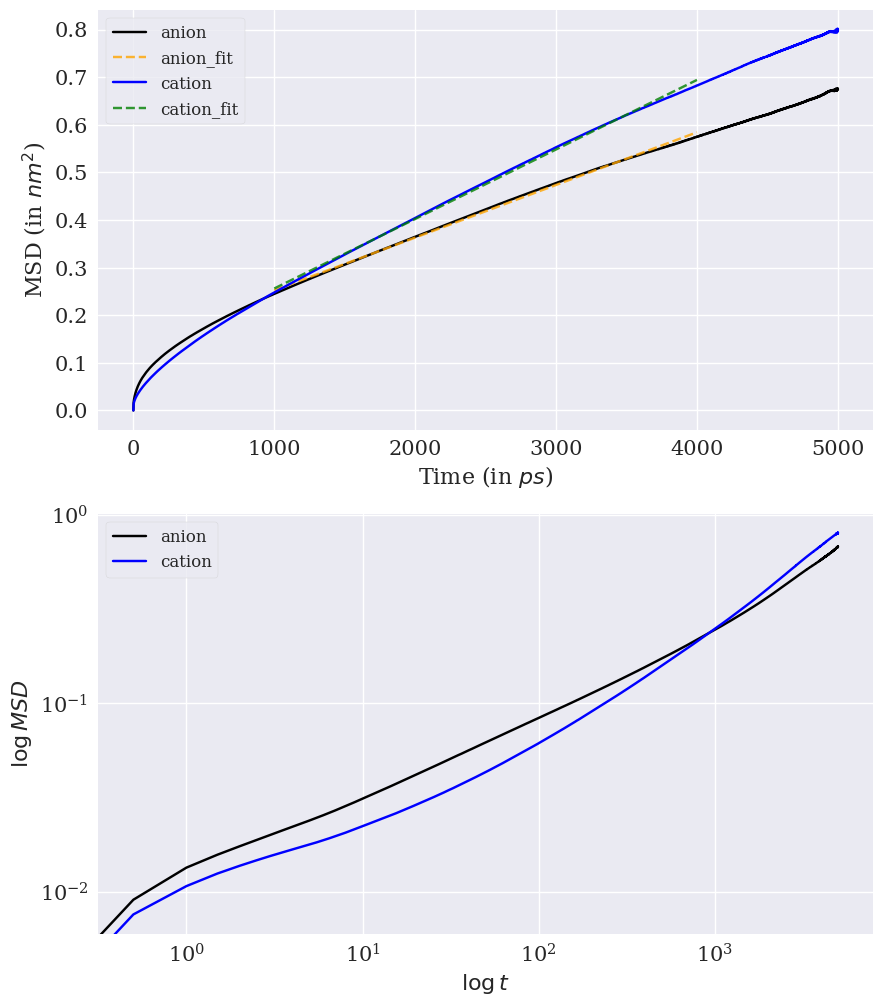

In [5]:
fig, axs = plt.subplots(2, 1, figsize = (10, 12))

axs[0].plot(t, msd_anion_il2, linestyle = 'solid', color = 'black', label = "anion")
axs[0].plot(t[2000:8000], m_anion*t[2000:8000]+c_anion, linestyle = 'dashed', color = 'orange', label = "anion_fit", alpha=0.8)
axs[0].plot(t, msd_cation_il2, linestyle = 'solid', color = 'blue', label = "cation")
axs[0].plot(t[2000:8000], m_cation*t[2000:8000]+c_cation, linestyle = 'dashed', color = 'green', label = "cation_fit", alpha=0.8)
axs[0].set_xlabel(r"Time (in $ps$)", fontsize = 16)
axs[0].set_ylabel(r"MSD (in $nm^2$)", fontsize = 16)
axs[0].grid(visible=True, axis='both')
axs[0].legend(fontsize=12, frameon = True)

axs[1].loglog(t, msd_anion_il2, linestyle = 'solid', color = 'black', label = "anion")
axs[1].loglog(t, msd_cation_il2, linestyle = 'solid', color = 'blue', label = "cation")
axs[1].set_xlabel(r"$\log t$", fontsize = 16)
axs[1].set_ylabel(r"$\log MSD$", fontsize = 16)
axs[1].grid(visible=True, axis='both')
axs[1].legend(fontsize=12, frameon = True)

plt.savefig('./cation2/msd_il2.png')
plt.show()

In [26]:
A = np.vstack([t[3000:9000], np.ones(6000)]).T
m_cation, c_cation = np.linalg.lstsq(A, msd_cation_il1[3000:9000], rcond=None)[0]
m_anion, c_anion = np.linalg.lstsq(A, msd_anion_il1[3000:9000], rcond=None)[0]

print(m_cation/6)
print(m_anion/6)

4.746984587779895e-06
2.3836347516074466e-06


In [30]:
print(msd_anion_il1[:20])

[0.         0.0124272  0.01826942 0.02202615 0.02487788 0.02719157 0.0290822  0.03068043 0.032032
 0.033253   0.03434563 0.0353154  0.03619445 0.03697545 0.03769712 0.03833387 0.03891665 0.03941525
 0.03984565 0.04023325]


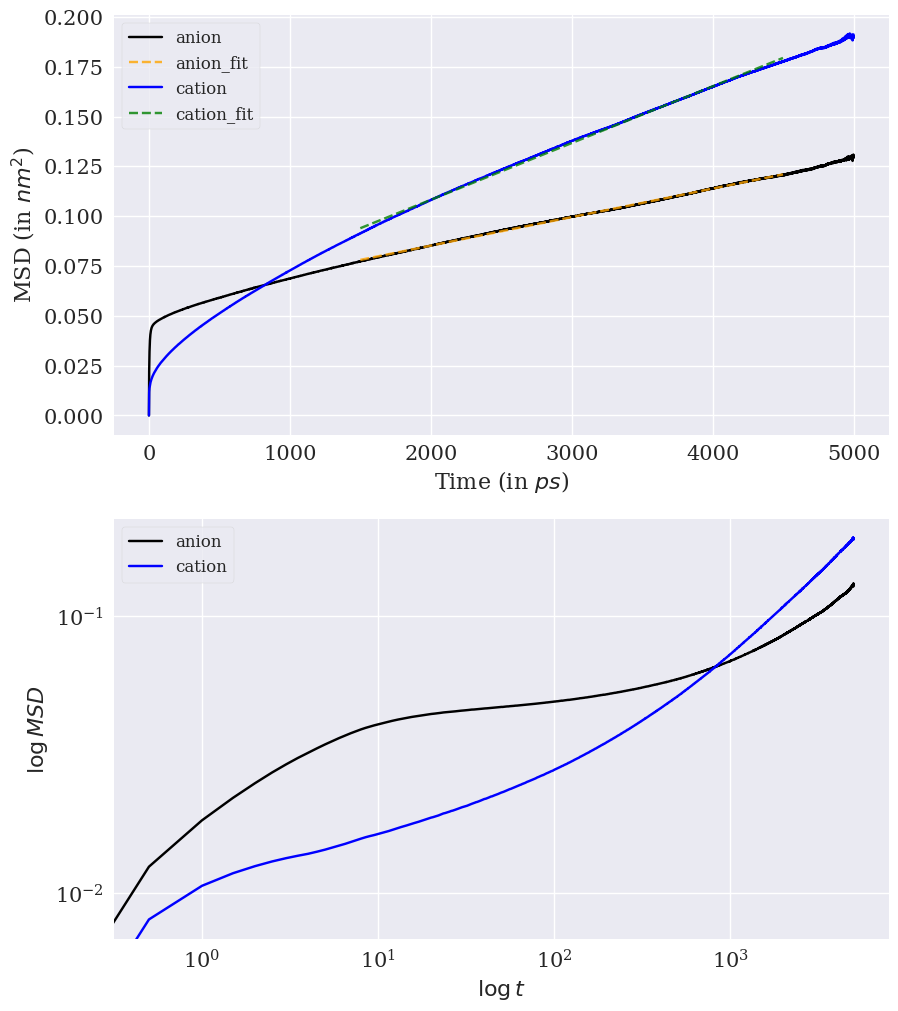

In [32]:
fig, axs = plt.subplots(2, 1, figsize = (10, 12))

axs[0].plot(t, msd_anion_il1, linestyle = 'solid', color = 'black', label = "anion")
axs[0].plot(t[3000:9000], m_anion*t[3000:9000]+c_anion, linestyle = 'dashed', color = 'orange', label = "anion_fit", alpha=0.8)
axs[0].plot(t, msd_cation_il1, linestyle = 'solid', color = 'blue', label = "cation")
axs[0].plot(t[3000:9000], m_cation*t[3000:9000]+c_cation, linestyle = 'dashed', color = 'green', label = "cation_fit", alpha=0.8)
axs[0].set_xlabel(r"Time (in $ps$)", fontsize = 16)
axs[0].set_ylabel(r"MSD (in $nm^2$)", fontsize = 16)
axs[0].grid(visible=True, axis='both')
axs[0].legend(fontsize=12, frameon = True)

axs[1].loglog(t, msd_anion_il1, linestyle = 'solid', color = 'black', label = "anion")
axs[1].loglog(t, msd_cation_il1, linestyle = 'solid', color = 'blue', label = "cation")
axs[1].set_xlabel(r"$\log t$", fontsize = 16)
axs[1].set_ylabel(r"$\log MSD$", fontsize = 16)
axs[1].grid(visible=True, axis='both')
axs[1].legend(fontsize=12, frameon = True)

plt.savefig('./cation/msd_il1.png')
plt.show()